In [15]:
import sympy  
from sympy import * 
  
x, y = symbols('x y') 
expr = x**2 + 2 * y + y**3
print("Expression : {} ".format(expr)) 
   
# Use sympy.Integral() method  
expr_intg = Integral(expr, x)   
      
print("Integral of expression with respect to x : {}".format(expr_intg))   
print("Value of the Integral : {} ".format(expr_intg.doit())) 

Expression : x**2 + y**3 + 2*y 
Integral of expression with respect to x : Integral(x**2 + y**3 + 2*y, x)
Value of the Integral : x**3/3 + x*(y**3 + 2*y) 
Integral(x**2 + y**3 + 2*y, x)


In [17]:
# import sympy 
from sympy import *

x, y = symbols('x y') 
expr = y**3 * x**2 + 2 * y*x + x * y**3
print("Expression : {} ".format(expr)) 

# Use sympy.Integral() method 
expr_intg = Integral(expr, x, y) 
	
print("Integral of expression with respect to x : {}".format(expr_intg)) 
print("Value of the Integral : {} ".format(expr_intg.doit())) 

Expression : x**2*y**3 + x*y**3 + 2*x*y 
Integral of expression with respect to x : Integral(x**2*y**3 + x*y**3 + 2*x*y, x, y)
Value of the Integral : x**2*y**2/2 + y**4*(x**3/12 + x**2/8) 


In [19]:
from __future__ import division
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

In [21]:
eq = Eq(f(t).diff(t), -2 * t * f(t))
print('ODE class: ', classify_ode(eq)[0])

ODE class:  separable


In [23]:
an_sol = dsolve(eq, ics={f(0): 1})
pprint(an_sol)

          2
        -t 
f(t) = ℯ   


In [27]:
lmbd_sol = lambdify(t, an_sol.rhs)

In [29]:
t_range = [0., 0.5, 1., 1.5, 2.0]
print([lmbd_sol(ti) for ti in t_range])

[1.0, 0.7788007830714049, 0.36787944117144233, 0.10539922456186433, 0.01831563888873418]


ODE class:  separable
          2
        -t 
f(t) = ℯ   


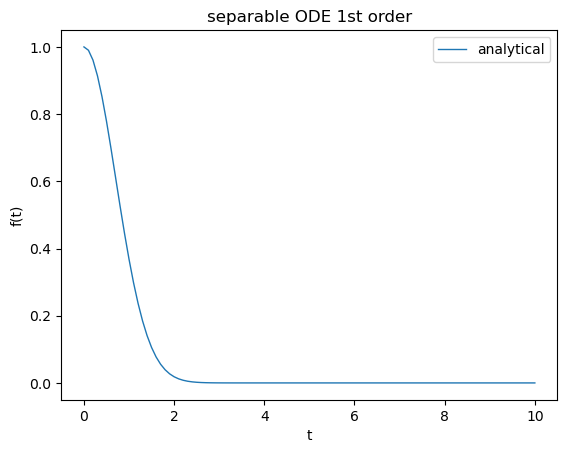

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

eq = Eq(f(t).diff(t), -2 * t * f(t))
an_sol = dsolve(eq, ics={f(0): 1})
print('ODE class: ', classify_ode(eq)[0])
pprint(an_sol)

t_begin=0.
t_end=10.
t_nsamples=101
t_space = np.linspace(t_begin, t_end, t_nsamples)

lmbd_sol = lambdify(t, an_sol.rhs)
x_an_sol = lmbd_sol(t_space)

plt.figure()
plt.plot(t_space, x_an_sol, linewidth=1, label='analytical')
plt.title('separable ODE 1st order')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

In [33]:
help (dsolve)

Help on function dsolve in module sympy.solvers.ode.ode:

dsolve(eq, func=None, hint='default', simplify=True, ics=None, xi=None, eta=None, x0=0, n=6, **kwargs)
    Solves any (supported) kind of ordinary differential equation and
    system of ordinary differential equations.

    For single ordinary differential equation

    It is classified under this when number of equation in ``eq`` is one.
    **Usage**

        ``dsolve(eq, f(x), hint)`` -> Solve ordinary differential equation
        ``eq`` for function ``f(x)``, using method ``hint``.

    **Details**

        ``eq`` can be any supported ordinary differential equation (see the
            :py:mod:`~sympy.solvers.ode` docstring for supported methods).
            This can either be an :py:class:`~sympy.core.relational.Equality`,
            or an expression, which is assumed to be equal to ``0``.

        ``f(x)`` is a function of one variable whose derivatives in that
            variable make up the ordinary differential equ

In [35]:
help (lambdify)

Help on function lambdify in module sympy.utilities.lambdify:

lambdify(args, expr, modules=None, printer=None, use_imps=True, dummify=False, cse=False, docstring_limit=1000)
    Convert a SymPy expression into a function that allows for fast
    numeric evaluation.

    .. warning::
       This function uses ``exec``, and thus should not be used on
       unsanitized input.

    .. deprecated:: 1.7
       Passing a set for the *args* parameter is deprecated as sets are
       unordered. Use an ordered iterable such as a list or tuple.

    Explanation

    For example, to convert the SymPy expression ``sin(x) + cos(x)`` to an
    equivalent NumPy function that numerically evaluates it:

    >>> from sympy import sin, cos, symbols, lambdify
    >>> import numpy as np
    >>> x = symbols('x')
    >>> expr = sin(x) + cos(x)
    >>> expr
    sin(x) + cos(x)
    >>> f = lambdify(x, expr, 'numpy')
    >>> a = np.array([1, 2])
    >>> f(a)
    [1.38177329 0.49315059]

    The primary purpose

ODE class:  separable
          ______________    
         ╱  2               
f(t) = ╲╱  t  - 2⋅t + 1  - 1


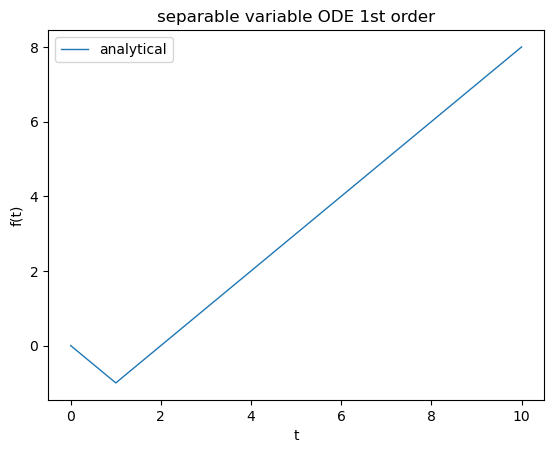

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

eq = Eq(f(t).diff(t), (t-1)/(f(t)+1))
an_sol = dsolve(eq, ics={f(0): 0})
print('ODE class: ', classify_ode(eq)[0])
pprint(an_sol)

t_begin=0.
t_end=10.
t_nsamples=101
t_space = np.linspace(t_begin, t_end, t_nsamples)

lmbd_sol = lambdify(t, an_sol.rhs)
x_an_sol = lmbd_sol(t_space)

plt.figure()
plt.plot(t_space, x_an_sol, linewidth=1, label='analytical')
plt.title('separable variable ODE 1st order')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

In [39]:
eq = Eq(f(t).diff(t), (t**2 + f(t)**2)/(t * f(t)))
print('ODE class: ', classify_ode(eq)[0])

ODE class:  factorable


In [41]:
an_sol = dsolve(eq, hint='1st_homogeneous_coeff_best', ics={f(2):2})
pprint(an_sol)

RecursionError: maximum recursion depth exceeded

ODE class:  factorable
       ⎛ 2    ⎞  ⎛ 3⎞
       ⎜t     ⎟  ⎝t ⎠
f(t) = ⎜── + 1⎟⋅ℯ    
       ⎝2     ⎠      


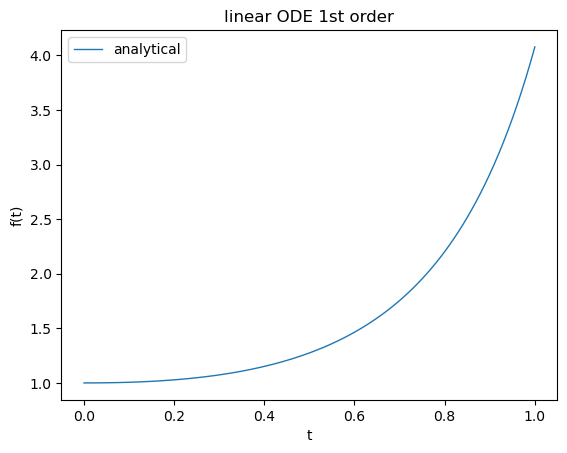

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

eq = Eq(f(t).diff(t), 3 * t**2 * f(t) + t * exp(t**3))
an_sol = dsolve(eq, hint='1st_linear', ics={f(0): 1})
print('ODE class: ', classify_ode(eq)[0])
pprint(an_sol)

t_begin=0.
t_end=1.
t_nsamples=101
t_space = np.linspace(t_begin, t_end, t_nsamples)

lmbd_sol = lambdify(t, an_sol.rhs)
x_an_sol = lmbd_sol(t_space)

plt.figure()
plt.plot(t_space, x_an_sol, linewidth=1, label='analytical')
plt.title('linear ODE 1st order')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()